<a href="https://colab.research.google.com/github/havocinc99/SmartKnowers/blob/master/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/drive/My Drive/Internship(Smartknower)/Machine Learning Algorithm/TypeOfWine.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# About Data Frame and Fixing Null Values

In [163]:
df.shape

(6497, 13)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [165]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [166]:
import numpy as np
df['fixed acidity'].fillna(df.groupby(['type'])['fixed acidity'].transform(np.mean),inplace=True)
df['volatile acidity'].fillna(df.groupby(['type'])['volatile acidity'].transform(np.mean),inplace=True)
df['citric acid'].fillna(df.groupby(['type'])['citric acid'].transform(np.mean),inplace=True)
df['residual sugar'].fillna(df.groupby(['type'])['residual sugar'].transform(np.mean),inplace=True)
df['chlorides'].fillna(df.groupby(['type'])['chlorides'].transform(np.mean),inplace=True)
df['pH'].fillna(df.groupby(['type'])['pH'].transform(np.mean),inplace=True)
df['sulphates'].fillna(df.groupby(['type'])['sulphates'].transform(np.mean),inplace=True)

In [167]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [168]:
df['type'].unique()

array(['white', 'red'], dtype=object)

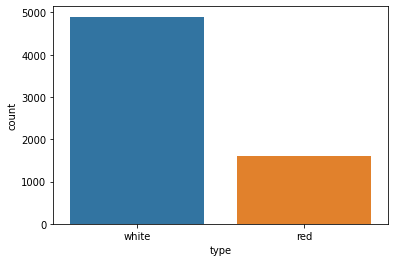

In [169]:
# Bar plot for Number of White and Red Wines
sns.countplot(x='type',data=df)
plt.show()

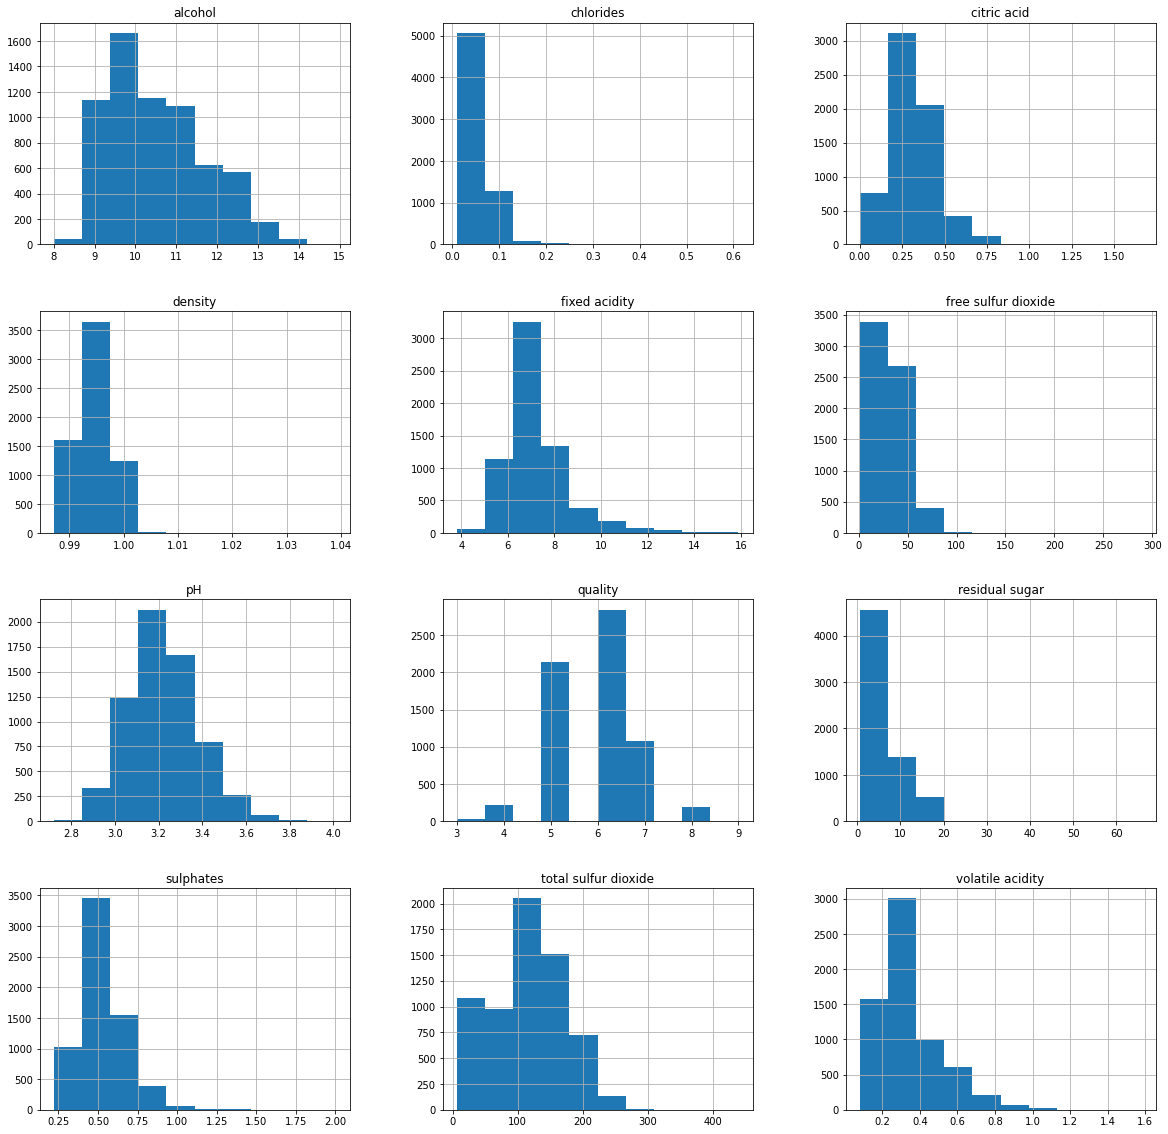

In [170]:
p = df.hist(figsize = (20,20))

# KNN

In [171]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [172]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,shuffle='True')

In [173]:
print(x_train.shape)
print(x_test.shape)

(4547, 12)
(1950, 12)


Maximum accuracy:- 0.9533333333333334 at K = 1


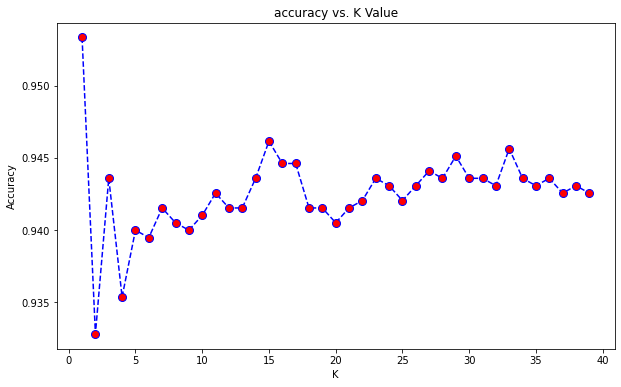

In [174]:
# Finding K value with Maximum Accuracy
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=8)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

In [175]:
from sklearn.neighbors import KNeighborsClassifier

KNNmodel = KNeighborsClassifier(n_neighbors=1,metric = 'euclidean')
KNNmodel.fit(x_train,y_train)
y_predKNN=KNNmodel.predict(x_test)

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predKNN)*100

95.33333333333334

In [177]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predKNN)

array([[ 418,   45],
       [  46, 1441]])

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predKNN))

              precision    recall  f1-score   support

         red       0.90      0.90      0.90       463
       white       0.97      0.97      0.97      1487

    accuracy                           0.95      1950
   macro avg       0.94      0.94      0.94      1950
weighted avg       0.95      0.95      0.95      1950



# Decision Tree

In [179]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [180]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,shuffle='True')

In [181]:
from sklearn.tree import DecisionTreeClassifier

DTmodel=DecisionTreeClassifier()
DTmodel.fit(x_train,y_train)
y_predDT=DTmodel.predict(x_test)

In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predDT)*100

98.25641025641025

In [183]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predDT)

array([[ 445,   18],
       [  16, 1471]])

In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predDT))

              precision    recall  f1-score   support

         red       0.97      0.96      0.96       463
       white       0.99      0.99      0.99      1487

    accuracy                           0.98      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



In [185]:
# Printing Text Representation of Decision tree
from sklearn import tree
text_representation = tree.export_text(DTmodel)
print(text_representation)

|--- feature_4 <= 0.06
|   |--- feature_6 <= 54.00
|   |   |--- feature_4 <= 0.04
|   |   |   |--- feature_8 <= 3.71
|   |   |   |   |--- class: white
|   |   |   |--- feature_8 >  3.71
|   |   |   |   |--- class: red
|   |   |--- feature_4 >  0.04
|   |   |   |--- feature_9 <= 0.39
|   |   |   |   |--- feature_6 <= 16.50
|   |   |   |   |   |--- class: red
|   |   |   |   |--- feature_6 >  16.50
|   |   |   |   |   |--- class: white
|   |   |   |--- feature_9 >  0.39
|   |   |   |   |--- feature_7 <= 0.99
|   |   |   |   |   |--- class: white
|   |   |   |   |--- feature_7 >  0.99
|   |   |   |   |   |--- feature_7 <= 0.99
|   |   |   |   |   |   |--- feature_11 <= 6.00
|   |   |   |   |   |   |   |--- class: white
|   |   |   |   |   |   |--- feature_11 >  6.00
|   |   |   |   |   |   |   |--- class: red
|   |   |   |   |   |--- feature_7 >  0.99
|   |   |   |   |   |   |--- class: red
|   |--- feature_6 >  54.00
|   |   |--- feature_1 <= 0.91
|   |   |   |--- feature_4 <= 0.01
|   |

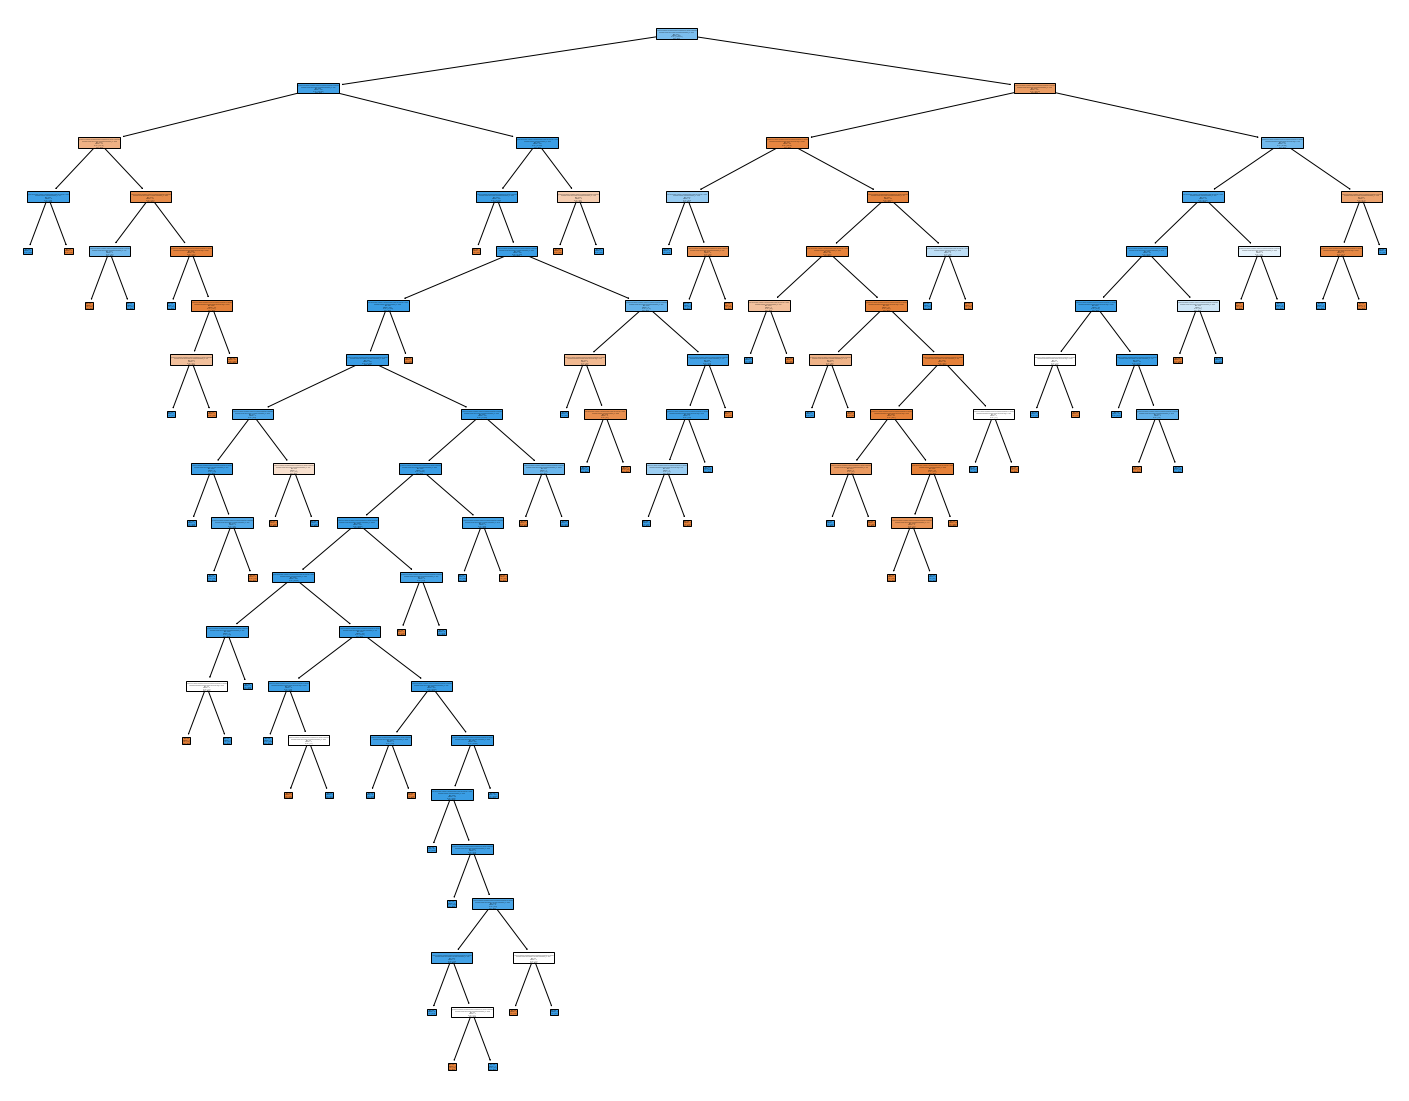

In [186]:
# Ploting Tree with plot_tree
fig = plt.figure(figsize=(25,20))
DT= tree.plot_tree(DTmodel, feature_names=x,  class_names=y,filled=True)
#DT= tree.plot_tree(DTmodel, feature_names=x,  class_names=y,filled=False)